In [1]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

train_path = (r'C:\Users\MARK JOSEPH\CNN\Covid19-dataset\train')
train_dataset = train.flow_from_directory(train_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 249 images belonging to 3 classes.


In [4]:
test = ImageDataGenerator(rescale=1./255)
test_path = (r'C:\Users\MARK JOSEPH\CNN\Covid19-dataset\test')
test_dataset = train.flow_from_directory(test_path,target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [5]:
from keras.backend import categorical_crossentropy
model = Sequential()

#Conv. Layer 1
model.add(Conv2D(32,
                 kernel_size=(3,3), #Standard
                 activation='relu',
                 input_shape=(224,224,3)))

#Conv. Layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Conv. Layer 3
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#Conv. Layer 4
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Conv. Layer 5
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
history = model.fit_generator(train_dataset, steps_per_epoch=7, epochs = 20, validation_data = test_dataset,validation_steps=2)

D:\Anaconda_MAIN\envs\tf\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
7/7 [==============================] - 37s 5s/step - loss: 1.2535 - accuracy: 0.4147 - val_loss: 1.0914 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 30s 4s/step - loss: 1.0090 - accuracy: 0.5069 - val_loss: 0.9756 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 29s 4s/step - loss: 0.8572 - accuracy: 0.6083 - val_loss: 0.8176 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 30s 4s/step - loss: 0.6186 - accuracy: 0.7419 - val_loss: 0.5607 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 32s 4s/step - loss: 0.5063 - accuracy: 0.7788 - val_loss: 0.6326 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 29s 4s/step - loss: 0.5223 - accuracy: 0.8111 - val_loss: 0.7309 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.5069 - accuracy: 0.7696 - val_loss: 0.5127 - val_accuracy: 0.7812
Epoch 8/20
7/7 [==================

In [8]:
result = model.evaluate(train_dataset)
print('Test score:', result[0])
print('Test accuracy:', result[1])

8/8 [==============================] - 13s 2s/step - loss: 0.2751 - accuracy: 0.8956
Test score: 0.27509957551956177
Test accuracy: 0.8955823183059692


In [9]:

path_dir = (r'C:/Users/MARK JOSEPH/CNN/Covid19-dataset/')
def loadImages(path, folder):
    data_files = sorted([os.path.join(path, folder, file)
                        for file in os.listdir(path + folder + '/')
                        if (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.webp'))])
    return data_files

validation_dataset = loadImages(path_dir, 'validation')

In [10]:
valid = validation_dataset
output = []
images = []

for x in valid:
    img = cv2.imread(x)
    img = img[:, :, :3]
    images.append(img)

    width = 224
    height = 224
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    output.append(resized)
output = np.array(output)
output = output/255

In [11]:
test = ImageDataGenerator(rescale=1./255)
test_path = (r'C:\Users\MARK JOSEPH\CNN\Covid19-dataset\test')
test_dataset = train.flow_from_directory(test_path, 
                                         target_size = (224, 224), 
                                         batch_size = 32, 
                                         class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [12]:
y_pred = model.predict(output)
predict = np.argmax(y_pred, axis=1)
print(predict)
y_pred.shape


1/1 [==============================] - 0s 285ms/step
[1 1 0 2 2 2 0 0 2 0]


(10, 3)

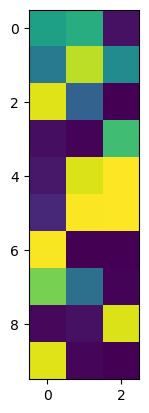

In [13]:
plt.figure()
plt.imshow(y_pred.reshape(10,3), interpolation = 'none')